In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import warnings

import sys
sys.path.insert(0, '../')

from dynamical_model import DynamicalModel

## default values to test with
r_eff = 1.85
theta_e = 1.63
gamma = 1.95

/var/folders/ry/23z2z0bd7_d814t1jlq8ydlw0000gn/T/ipykernel_25515/2337266713.py:5: RuntimeWarning: invalid value encountered in sqrt
  q_obl = np.sqrt(q_**2 - np.cos(i)**2) / np.sin(i)
/var/folders/ry/23z2z0bd7_d814t1jlq8ydlw0000gn/T/ipykernel_25515/2337266713.py:6: RuntimeWarning: invalid value encountered in sqrt
  q_pro = np.sin(i) / np.sqrt(q_**2 - np.cos(i)**2)


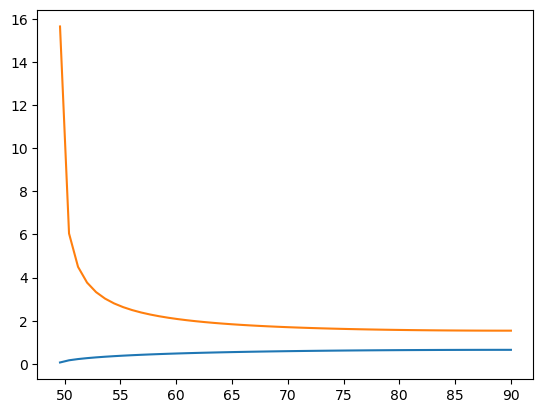

In [2]:
q_ = 0.65

i = np.linspace(10, 90, 100) / 180 * np.pi

q_obl = np.sqrt(q_**2 - np.cos(i)**2) / np.sin(i)
q_pro = np.sin(i) / np.sqrt(q_**2 - np.cos(i)**2)

plt.plot(i * 180 / np.pi, q_obl)
plt.plot(i * 180 / np.pi, q_pro)

## test single aperture calculation

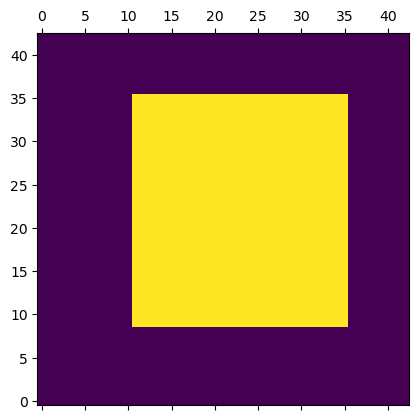

In [3]:
binning = np.zeros((43, 43))

w = 10
binning[22-3-w:22+4+w, 23-2-w:23+3+w] = np.ones((7+2*w, 5+2*w))

#binning = 1

plt.matshow(binning, origin='lower')

In [11]:
anisotropy_model = 'constant'
ani_param = 1


dyn_model = DynamicalModel(mass_model='powerlaw')

theta_e = 1.63317001e+00
gamma = 1.95886843e+00
q = 7.61476589e-01 
pa = 1.15742114e+02,
#1.87925701e+03, 9.06948652e+01, 8.71954746e-01, 
ani_param = 1.26886523e+00

    
# dyn_model.PSF_FWHM = 0.7 

def get_difference(
    theta_e = 1.63317001e+00,
    gamma = 1.95886843e+00,
    q = 7.61476589e-01,
    pa = 1.15742114e+02,
    #1.87925701e+03, 9.06948652e+01, 8.71954746e-01, 
    ani_param = 1.26886523e+00,
    psf_fwhm = 0.7,
    r_sersic_factor = 1.
    ):
    """
    """
    dyn_model.PSF_FWHM = psf_fwhm
    
    dyn_model.R_sersic_1 = lambda : 2.3576 * r_sersic_factor
    dyn_model.R_sersic_2 = lambda : 0.3302 * r_sersic_factor
    
    np.random.seed(2)
    a, _ = dyn_model.compute_jampy_v_rms_model([theta_e, gamma, 1], pa=121,
                                            ani_param=ani_param,
                    
                                            anisotropy_model=anisotropy_model,
                                            supersampling_factor=5,
                                            voronoi_bins=binning-1,
                                            is_spherical=True,
                                            do_convolve=True,
                                            q_light=1
                                           )

    np.random.seed(2)
    b, _ = dyn_model.compute_jampy_v_rms_model([theta_e, gamma, q], 
                                            pa=121, inclination=90,
                                            ani_param=ani_param,
                                            anisotropy_model=anisotropy_model,
                                            supersampling_factor=5,
                                            voronoi_bins=binning-1,
                                            do_convolve=True,
                                            q_light=None, shape='prolate'                                
                                           )

    return ((b - a)/b)[0]

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
# #axes = [axes]

# def plot_mat(arr, i, cmap='viridis', vmax=440, vmin=170):
#     divider = make_axes_locatable(axes[i])
#     im = axes[i].matshow(arr, origin='lower', cmap=cmap, vmax=vmax, vmin=vmin)
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     fig.colorbar(im, cax=cax, orientation='vertical', label=r'$\sigma_{\rm los}$ (km/s)')

# #cbar = axes[0].matshow(a[0], origin='lower')
# #cbar = axes[1].matshow(b[0], origin='lower')
# #plt.colorbar(cbar)

# #cbar = axes[2].matshow(a[0] - b[0], origin='lower', cmap='RdBu')
# #plt.colorbar(cbar)
# plot_mat(a.reshape((43, 43)), 0, cmap='viridis', vmax=350, vmin=200)
# plot_mat(b.reshape((43, 43)), 1, cmap='viridis', vmax=350, vmin=200)
# plot_mat(b.reshape((43, 43)) - a.reshape((43, 43)), 2, cmap='RdBu_r', 
#          vmax=np.max(b)*0.1, vmin=-np.max(b)*0.1)

# axes[0].set_title('spherical')
# axes[1].set_title('elliptical')
# axes[2].set_title('elliptical - spherical')

# fig.tight_layout()

### scaling both r_eff and theta_e

In [12]:
scaling_factor = np.linspace(0.5, 2, 10)

diffs_scaling = []

for s in scaling_factor:
    diffs_scaling.append(get_difference(theta_e=theta_e*s, r_sersic_factor=s))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.16224988 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988
 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988
 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988]
prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.16224988 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988
 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988
 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988
 1.16224988 1.16224988]
prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.16224988 1.16224988 1.16224988 1.16224988 1.16224988 1.16224988
 1.16224988 1.16224988 1.16224988 

Text(0, 0.5, '$\\Delta v_{\\rm rms}$ (%)')

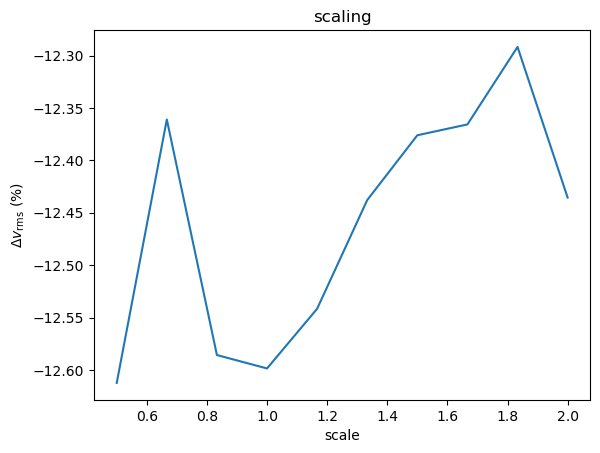

In [13]:
plt.plot(scaling_factor, np.array(diffs_scaling)*100)
plt.title('scaling')
plt.xlabel('scale')
plt.ylabel(r'$\Delta v_{\rm rms}$ (%)')

### only scaling r_sersic

In [10]:
scaling_factor = np.linspace(0.45, 2, 10)

diffs_r_eff = []

for s in scaling_factor:
    diffs_r_eff.append(get_difference(r_sersic_factor=s))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.16864087 1.16864087 1.16864087 1.16864087 1.16864087 1.16864087
 1.16864087 1.16864087 1.16864087 1.16864087 1.16864087 1.16864087
 1.16864087 1.16864087 1.16864087 1.16864087 1.16864087 1.16864087
 1.16864087 1.16864087]
prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
[1.16864087 1.16864087 1.16864087 1.16864087 1.16864087 1.16864087
 1.16864087 1.16864087 1.16864087 1.16864087 1.16864087 1.16864087
 1.16864087 1.16864087 1.16864087 1.16864087 1.16864087 1.16864087
 1.16864087 1.16864087]
prolate
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Re

Text(0, 0.5, '$\\Delta v_{\\rm rms}$ (%)')

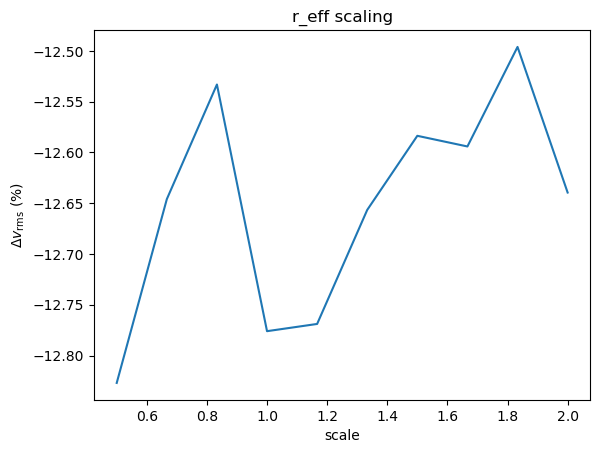

In [14]:
plt.plot(scaling_factor, np.array(diffs_r_eff)*100)
plt.title('r_eff scaling')
plt.xlabel('scale')
plt.ylabel(r'$\Delta v_{\rm rms}$ (%)')

### changing q

In [9]:
qs = np.linspace(0.3, 1., 10)

diffs_q = []

for q in qs:
    diffs_q.append(get_difference(q=q))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 

Text(0, 0.5, '$\\Delta v_{\\rm rms}$ (%)')

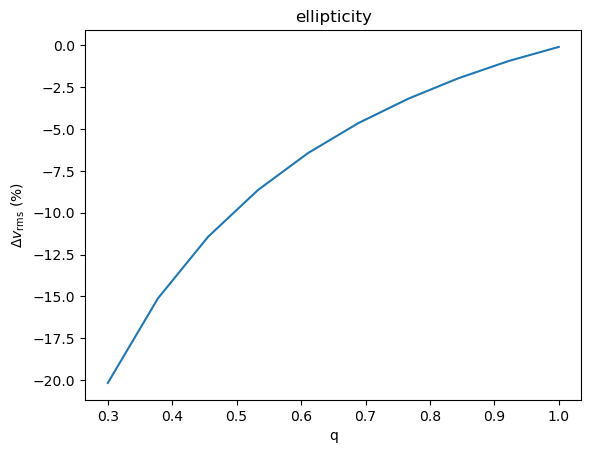

In [10]:
plt.plot(qs, np.array(diffs_q)*100)

plt.title('ellipticity')
plt.xlabel('q')

plt.ylabel(r'$\Delta v_{\rm rms}$ (%)')

### changing beta

In [10]:
betas = np.linspace(-0.4, .4, 10)

diffs_betas = []

for b in betas:
    diffs_betas.append(get_difference(ani_param=np.sqrt(1 - b)))

Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 10%: Change `inner_slope` or `outer_slope` or increase `ngauss`
Residuals > 

Text(0, 0.5, '$\\Delta v_{\\rm rms}$ (%)')

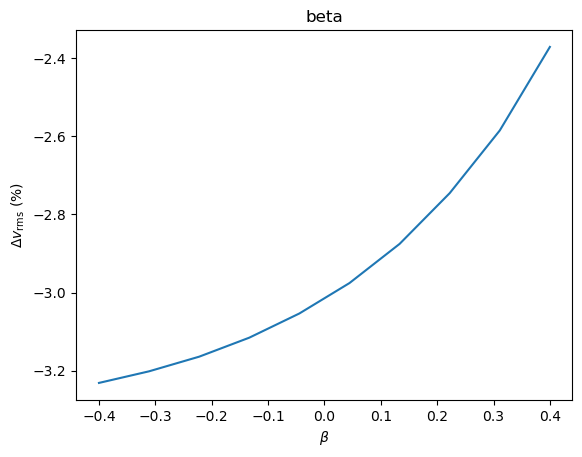

In [11]:
plt.plot(betas, np.array(diffs_betas)*100)

plt.title('beta')
plt.xlabel(r'$\beta$')

plt.ylabel(r'$\Delta v_{\rm rms}$ (%)')